# Exercises
Build a simple deep learning model to classify the Iris dataset by Keras.

## Prepar the data

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

iris = datasets.load_iris()

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(iris.data)
y = np_utils.to_categorical(iris.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2023-02-26 15:55:45.448575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Build the model

In [7]:
from keras import Sequential
from keras.layers import Dense,Activation

model = Sequential()
model.add(Dense(16, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model

In [8]:
history = model.fit(X_train, y_train, epochs=30, batch_size=8)

Epoch 1/30
15/15 [==============================] - 1s 5ms/step - loss: 1.1511 - accuracy: 0.1333
Epoch 2/30
15/15 [==============================] - 0s 8ms/step - loss: 1.0819 - accuracy: 0.2750
Epoch 3/30
15/15 [==============================] - 0s 9ms/step - loss: 1.0199 - accuracy: 0.4750
Epoch 4/30
15/15 [==============================] - 0s 7ms/step - loss: 0.9638 - accuracy: 0.6000
Epoch 5/30
15/15 [==============================] - 0s 10ms/step - loss: 0.9117 - accuracy: 0.6833
Epoch 6/30
15/15 [==============================] - 0s 6ms/step - loss: 0.8625 - accuracy: 0.7333
Epoch 7/30
15/15 [==============================] - 0s 5ms/step - loss: 0.8131 - accuracy: 0.7583
Epoch 8/30
15/15 [==============================] - 0s 7ms/step - loss: 0.7644 - accuracy: 0.7667
Epoch 9/30
15/15 [==============================] - 0s 7ms/step - loss: 0.7154 - accuracy: 0.7833
Epoch 10/30
15/15 [==============================] - 0s 7ms/step - loss: 0.6710 - accuracy: 0.8000
Epoch 11/30
15/15 

## Plot the loss and accuracy

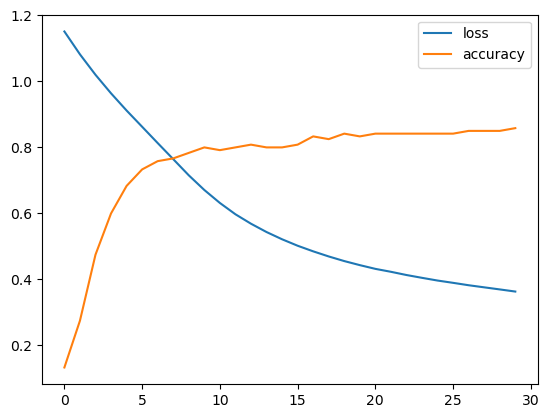

In [9]:
hist_loss = history.history['loss']
hist_acc = history.history['accuracy']

import matplotlib.pyplot as plt
plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()

## Evaluate the model

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print('loss: ', loss)
print('accuracy: ', accuracy)

1/1 [==============================] - 0s 435ms/step - loss: 0.2857 - accuracy: 0.9333
loss:  0.28574973344802856
accuracy:  0.9333333373069763


## Predict the class of a new sample

In [11]:
model.predict(X_test)

1/1 [==============================] - 0s 207ms/step


array([[4.03020047e-02, 5.81476510e-01, 3.78221571e-01],
       [9.63452458e-01, 2.13734750e-02, 1.51740769e-02],
       [9.59143916e-04, 6.70608878e-02, 9.31979954e-01],
       [6.30529895e-02, 5.27955353e-01, 4.08991635e-01],
       [2.07454320e-02, 3.68410647e-01, 6.10843956e-01],
       [9.41547990e-01, 3.09564564e-02, 2.74955370e-02],
       [1.51841745e-01, 5.79845965e-01, 2.68312275e-01],
       [2.45872252e-02, 1.30957827e-01, 8.44455004e-01],
       [1.30857322e-02, 6.25601053e-01, 3.61313224e-01],
       [5.97684383e-02, 6.61676526e-01, 2.78555006e-01],
       [4.96934988e-02, 2.14121222e-01, 7.36185253e-01],
       [9.53298986e-01, 2.42862459e-02, 2.24147979e-02],
       [9.59383786e-01, 2.22086124e-02, 1.84076857e-02],
       [9.58047032e-01, 2.17352472e-02, 2.02176627e-02],
       [9.83186364e-01, 9.44435131e-03, 7.36921234e-03],
       [9.24017802e-02, 3.68475825e-01, 5.39122403e-01],
       [2.12394074e-02, 1.81612357e-01, 7.97148287e-01],
       [4.00418676e-02, 7.16490